# 导入相关的包

In [1]:
#invite people for the tianchi tangniaobing party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("../raw_data/d_train.csv",encoding="gbk")
test = pd.read_csv("../raw_data/d_test_A.csv",encoding="gbk")


In [3]:
test.isnull().sum()

id               0
性别               0
年龄               0
体检日期             0
*天门冬氨酸氨基转换酶    185
*丙氨酸氨基转换酶      185
*碱性磷酸酶         185
*r-谷氨酰基转换酶     185
*总蛋白           185
白蛋白            185
*球蛋白           185
白球比例           185
甘油三酯           176
总胆固醇           176
高密度脂蛋白胆固醇      176
低密度脂蛋白胆固醇      176
尿素             194
肌酐             194
尿酸             194
乙肝表面抗原         831
乙肝表面抗体         831
乙肝e抗原          831
乙肝e抗体          831
乙肝核心抗体         831
白细胞计数            5
红细胞计数            5
血红蛋白             5
红细胞压积            5
红细胞平均体积          5
红细胞平均血红蛋白量       5
红细胞平均血红蛋白浓度      5
红细胞体积分布宽度        5
血小板计数            5
血小板平均体积          6
血小板体积分布宽度        6
血小板比积            6
中性粒细胞%           5
淋巴细胞%            5
单核细胞%            5
嗜酸细胞%            5
嗜碱细胞%            5
dtype: int64

In [191]:
#data.clumns
data.columns
data.head(10)

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,女,74,18/10/2017,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,男,31,21/09/2017,24.97,25.53,109.03,65.42,80.82,46.40,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,男,55,21/09/2017,37.32,40.03,88.49,25.15,74.17,41.63,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,男,39,16/10/2017,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,女,35,10/10/2017,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


In [192]:
#rename clumns's name
rename_dict = {"性别":"gender","年龄":"age","体检日期":"date","血糖":"blood_sugar"}
data.rename(columns=rename_dict,inplace=True)

In [ ]:
features = [x for x in list(data.columns) if x not in ["gender","age","date","blood_sugar","id"]]
fea_rename = { v:"feature_" + str(k) for k,v in enumerate(features)}
fea_rename

In [194]:
data["gender"] = data.gender.apply(lambda x: 1 if x == "男" else 0)

In [203]:
data.rename(columns=fea_rename,inplace=True)

In [140]:
data.head(5)

,id,gender,age,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,blood_sugar
0,1,1,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,1,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,1,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,0,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,0,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


In [100]:
# blood_sugar distribute
data.blood_sugar.describe()

count    5642.000000
mean        5.631925
std         1.544882
min         3.070000
25%         4.920000
50%         5.290000
75%         5.767500
max        38.430000
Name: blood_sugar, dtype: float64

In [101]:
data.isnull().sum()

id                0
gender            0
age               0
date              0
feature_0      1221
feature_1      1221
feature_2      1221
feature_3      1221
feature_4      1221
feature_5      1221
feature_6      1221
feature_7      1221
feature_8      1219
feature_9      1219
feature_10     1219
feature_11     1219
feature_12     1378
feature_13     1378
feature_14     1378
feature_15     4279
feature_16     4279
feature_17     4279
feature_18     4279
feature_19     4279
feature_20       16
feature_21       16
feature_22       16
feature_23       16
feature_24       16
feature_25       16
feature_26       16
feature_27       16
feature_28       16
feature_29       23
feature_30       23
feature_31       23
feature_32       16
feature_33       16
feature_34       16
feature_35       16
feature_36       16
blood_sugar       0
dtype: int64

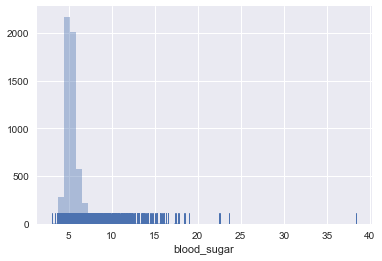

In [102]:
#histogram
sns.distplot(data['blood_sugar'],hist=True,rug=True,kde=False)

In [103]:
#skewness and kurtosis
print("Skewness: %f" % data['blood_sugar'].skew())
print("Kurtosis: %f" % data['blood_sugar'].kurt())

Skewness: 5.551989
Kurtosis: 59.163792


<font size="4">峰度(Kurtosis)大于0表示该总体数据分布与正态分布相比较为陡峭，为尖顶峰;峰度的绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大。<br>
偏度(Skewness)大于0表示其数据分布形态与正态分布相比为正偏或右偏，即有一条长尾巴拖在右边，数据右端有较多的极端值；</font>

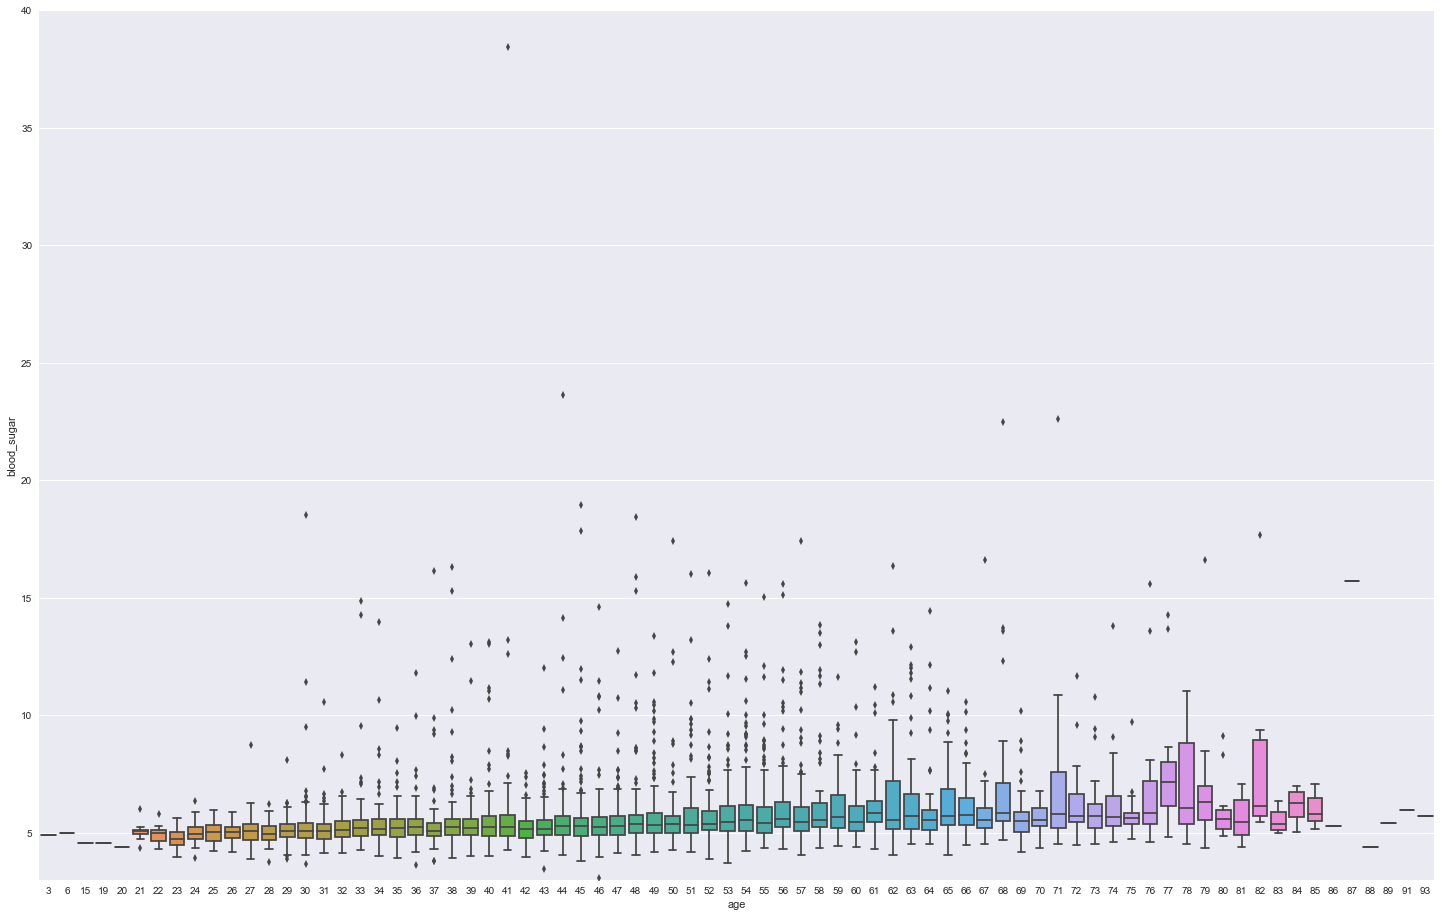

In [104]:
#box plot age/blood_sugar
var = "age"
data_age_bs = pd.concat([data['blood_sugar'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 16))
fig = sns.boxplot(x=var, y="blood_sugar", data=data_age_bs)
fig.axis(ymin=3, ymax=40);

        1. 从上图可以看出，年龄越大越容易得糖尿病的趋势
        2. 这批数据在30-70岁之间存在的异常值较多
        3. 在50岁之后血糖含量中位数降低、所以可以判断的是血糖整体逐年偏高

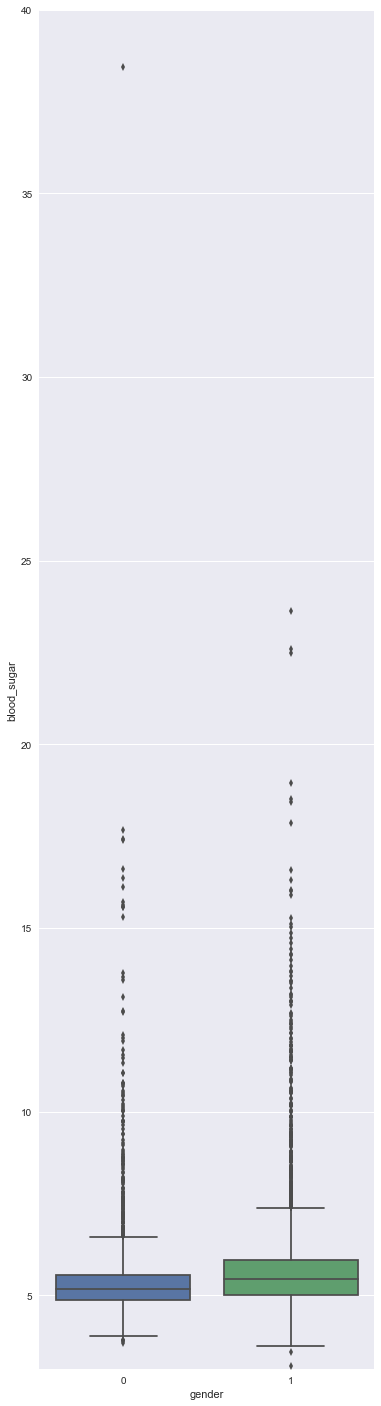

In [105]:
var = "gender"
data_age_bs = pd.concat([data['blood_sugar'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 25))
fig = sns.boxplot(x=var, y="blood_sugar", data=data_age_bs)
fig.axis(ymin=3, ymax=40);

    血糖的含量跟性别没有什么太大关系

## 初步探索总结
    1. 血糖含量值整体不太符合正太分布，峰度极大，导致非常陡峭，偏度算是正常情况吧，也表明了存在不少的常尾现象；
    2. 对血糖含量跟数据中出现的类别特征初步探索发现，血糖的值跟性别关联不大，也就是性别属于无关于血糖的值，
    3. 血糖的值跟年龄有很大关系，随着年龄的增长，血糖的平均值逐渐增高
    解决方案：
    1. 对血糖值正态化
    2. 删除性别列
    3. 统计特征重点关注年龄

In [106]:
# fillna = mean
data.fillna(value=data.mean,inplace=True)

In [107]:
data.isnull().sum()

id             0
gender         0
age            0
date           0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
blood_sugar    0
dtype: int64

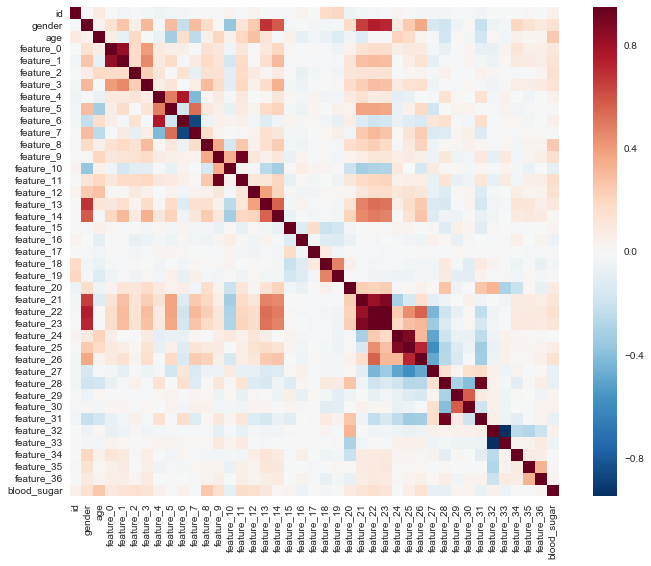

In [116]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

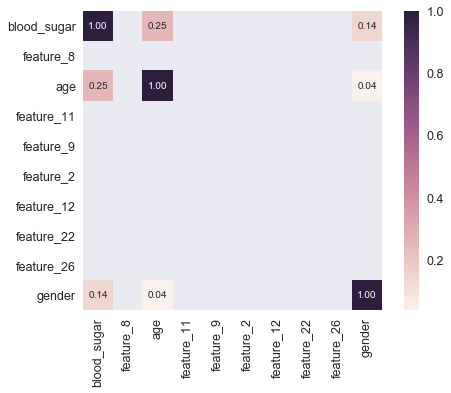

In [124]:
#blood_sugar correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'blood_sugar')['blood_sugar'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 再探索总结
    1. 年龄依然是最强特征，性别也是有用的，性别和年龄结合也算是比较好的特征

# 探索处理缺失值

In [141]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
feature_16,4279,0.758419
feature_19,4279,0.758419
feature_15,4279,0.758419
feature_17,4279,0.758419
feature_18,4279,0.758419
feature_14,1378,0.244240
feature_12,1378,0.244240
feature_13,1378,0.244240
feature_3,1221,0.216413
feature_7,1221,0.216413


    缺失值处理：
    1. feature_14-19直接愉快的删除
    2. 其他的暂时用均值填充

In [205]:
#dealing with missing data
# df_train = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = data.drop(df_train.loc[df_train['Electrical'].isnull()].index)
data.fillna(value=data.mean,inplace=True)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [144]:
data.head()
data.isnull().sum()

id             0
gender         0
age            0
date           0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
blood_sugar    0
dtype: int64

# 数据预处理

In [145]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['blood_sugar'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.6584775 ]
 [-1.39953509]
 [-1.29595812]
 [-1.27653744]
 [-1.2506432 ]
 [-1.20532828]
 [-1.19885472]
 [-1.19885472]
 [-1.19238116]
 [-1.14059267]]

outer range (high) of the distribution:
[[  7.63755508]
 [  7.79292053]
 [  7.90944461]
 [  8.27843755]
 [  8.33669959]
 [  8.62153624]
 [ 10.91317659]
 [ 10.97791219]
 [ 11.6446889 ]
 [ 21.23203169]]


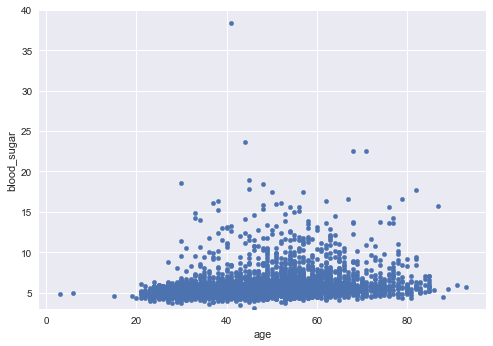

In [146]:
#bivariate analysis saleprice/grlivarea
var = 'age'
data_plot = pd.concat([data['blood_sugar'], data[var]], axis=1)
data_plot.plot.scatter(x=var, y='blood_sugar', ylim=(3,40));

    关于年龄的异常数据：
    1. 小于20岁的数据都删除
    2. 大于88岁的数据都删除
    3. 血糖大于20的数据都删除

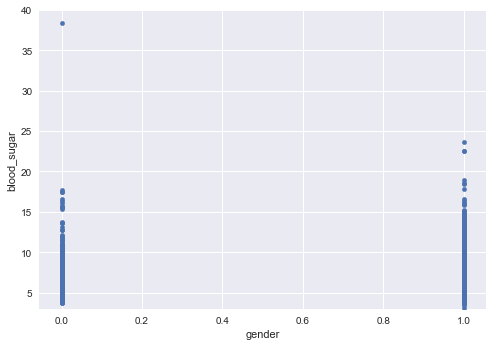

In [147]:
var = 'gender'
data_plot = pd.concat([data['blood_sugar'], data[var]], axis=1)
data_plot.plot.scatter(x=var, y='blood_sugar', ylim=(3,40));

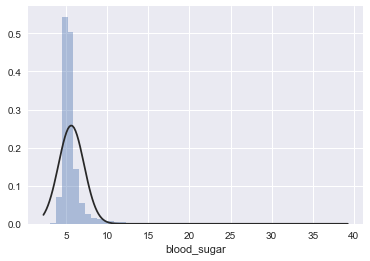

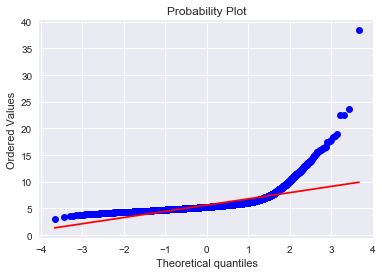

In [195]:
#histogram and normal probability plot
sns.distplot(data['blood_sugar'], fit=norm,kde=False);
fig = plt.figure()
res = stats.probplot(data['blood_sugar'], plot=plt)

In [196]:
data["blood_sugar"] = np.log(data["blood_sugar"])

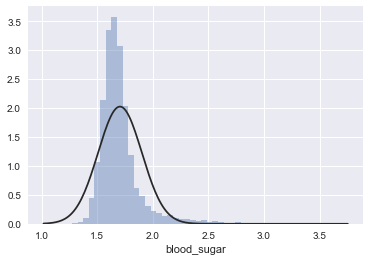

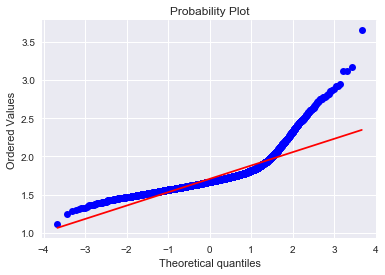

In [197]:
#histogram and normal probability plot
sns.distplot(data['blood_sugar'], fit=norm,kde=False);
fig = plt.figure()
res = stats.probplot(data['blood_sugar'], plot=plt)

In [198]:
data["blood_sugar"] = np.log(data["blood_sugar"])

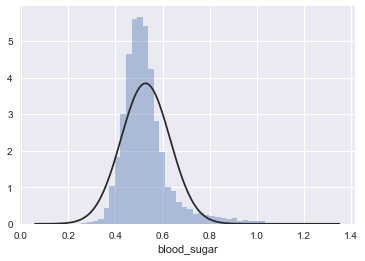

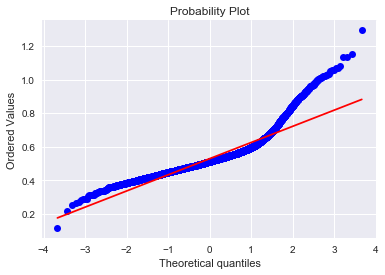

In [199]:
#histogram and normal probability plot
sns.distplot(data['blood_sugar'], fit=norm,kde=False);
fig = plt.figure()
res = stats.probplot(data['blood_sugar'], plot=plt)

In [200]:
data["blood_sugar"] = np.log(data["blood_sugar"])

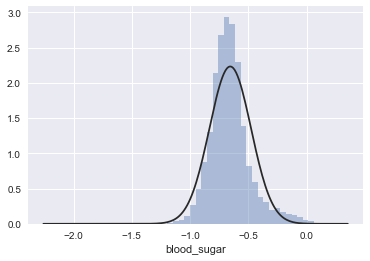

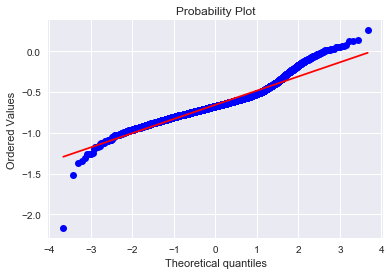

In [201]:
#histogram and normal probability plot
sns.distplot(data['blood_sugar'], fit=norm,kde=False);
fig = plt.figure()
res = stats.probplot(data['blood_sugar'], plot=plt)

    对血糖值的处理
    1. 三次以log为底的平滑

TypeError: unsupported operand type(s) for +: 'float' and 'method'

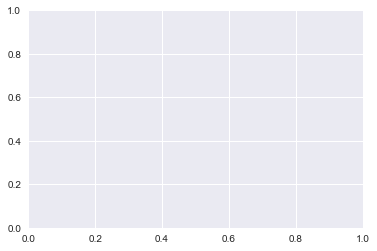

In [206]:
#histogram and normal probability plot
sns.distplot(data['feature_8'], fit=norm,kde=False);
fig = plt.figure()
res = stats.probplot(data['feature_8'], plot=plt)